<a href="https://colab.research.google.com/github/ranarokni/Movie-Recommendation-System/blob/main/notbooks%5CEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
from google.colab import files

uploaded = files.upload()

Saving NewMoviesMetadata.csv to NewMoviesMetadata.csv


In [88]:
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving NewCredits.csv to NewCredits.csv


Saving NewKeywords.csv to NewKeywords.csv


In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import ast


In [26]:
movies = pd.read_csv('NewMoviesMetadata.csv')
movies.head()

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,video,vote_average,vote_count,name_belongs_to_collection,id_belongs_to_collection,poster_path_belongs_to_collection,backdrop_path_belongs_to_collection
0,False,30000000,"['animation', 'comedy', 'family']",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,10194.0,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,False,65000000,"['adventure', 'fantasy', 'family']",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,NaN,NaN,NaN
2,False,0,"['romance', 'comedy']",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,119050.0,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,False,16000000,"['comedy', 'drama', 'romance']",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN,NaN,NaN
4,False,0,[],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,96871.0,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg


In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45460 entries, 0 to 45459
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                45460 non-null  bool   
 1   budget                               45460 non-null  int64  
 2   genres                               45460 non-null  object 
 3   homepage                             7778 non-null   object 
 4   id                                   45460 non-null  int64  
 5   imdb_id                              45443 non-null  object 
 6   original_language                    45449 non-null  object 
 7   original_title                       45460 non-null  object 
 8   overview                             44506 non-null  object 
 9   popularity                           45460 non-null  float64
 10  poster_path                          45077 non-null  object 
 11  production_companies        

In [ ]:
movies['original_language'] = movies['original_language'].fillna('')

In [92]:
def get_text(text, obj='name'):
    text = ast.literal_eval(text)

    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)

In [93]:
movies['spoken_languages'] = movies['spoken_languages'].apply(get_text)

In [97]:
movies['production_companies']

,production_companies
0,Pixar Animation Studios
1,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
2,"['Warner Bros.', 'Lancaster Gate']"
3,Twentieth Century Fox Film Corporation
4,"['Sandollar Productions', 'Touchstone Pictures']"
...,...
45455,[]
45456,Sine Olivia
45457,American World Pictures
45458,Yermoliev


In [99]:
movies['production_countries'][1]

'United States of America'

In [125]:
credits = pd.read_csv('NewCredits.csv')
credits.head()

,cast,id,job
0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",862,"{'director': 'John Lasseter', 'writer': 'Joss ..."
1,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",8844,"{'director': 'Joe Johnston', 'writer': 'Jonath..."
2,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",15602,"{'director': 'Howard Deutch', 'writer': 'Mark ..."
3,"['Whitney Houston', 'Angela Bassett', 'Loretta...",31357,"{'director': 'Forest Whitaker', 'writer': 'Ron..."
4,"['Steve Martin', 'Diane Keaton', 'Martin Short...",11862,"{'director': 'Charles Shyer', 'writer': 'Nancy..."


In [128]:
credits['job'][0]

"{'director': 'John Lasseter', 'writer': 'Joss Whedon', 'producer': 'Bonnie Arnold', 'composer': nan}"

In [126]:
keywords = pd.read_csv('NewKeywords.csv')
keywords.head()

,id,keywords
0,862,"['jealousi', 'toy', 'boy', 'friendship', 'frie..."
1,8844,"['boardgam', 'disappear', ""basedonchildren'sbo..."
2,15602,"['fish', 'bestfriend', 'duringcreditssting', '..."
3,31357,"['basedonnovel', 'interracialrelationship', 's..."
4,11862,"['babi', 'midlifecrisi', 'confid', 'age', 'dau..."


#fee0d2 #fcbba1 #fc9272 #fb6a4a #ef3b2c #cb181d #99000d


## Distribution of Adult and Non Adult Movies

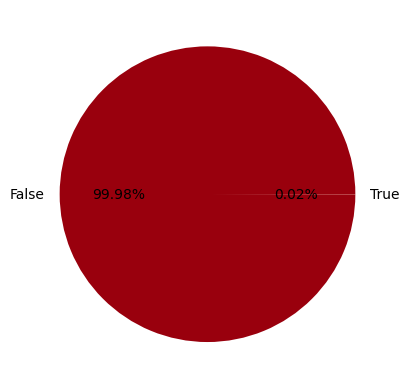

In [29]:
labels = ['False','True']
plt.pie(movies['adult'].value_counts().values, labels=labels, autopct='%1.2f%%', colors=['#99000d', '#fcbba1'])
plt.show()

In [18]:
movies.drop(columns=['adult'], inplace=True)

## Home Page

In [19]:
movies['homepage'].isna().sum()/len(movies['homepage']) * 100

np.float64(82.89045314562252)

In [20]:
movies.drop(columns=['homepage'], inplace=True)

## Original Language

In [21]:
movies['original_language'].value_counts()

,count
original_language,
en,32267
fr,2438
it,1529
ja,1349
de,1080
...,...
uz,1
mt,1
hy,1


/tmp/ipython-input-366276230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=movies['original_language'], palette=colors)
/tmp/ipython-input-366276230.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(x=movies['original_language'], palette=colors)
/tmp/ipython-input-366276230.py:4: UserWarning: The palette list has more values (45460) than needed (89), which may not be intended.
  sns.countplot(x=movies['original_language'], palette=colors)


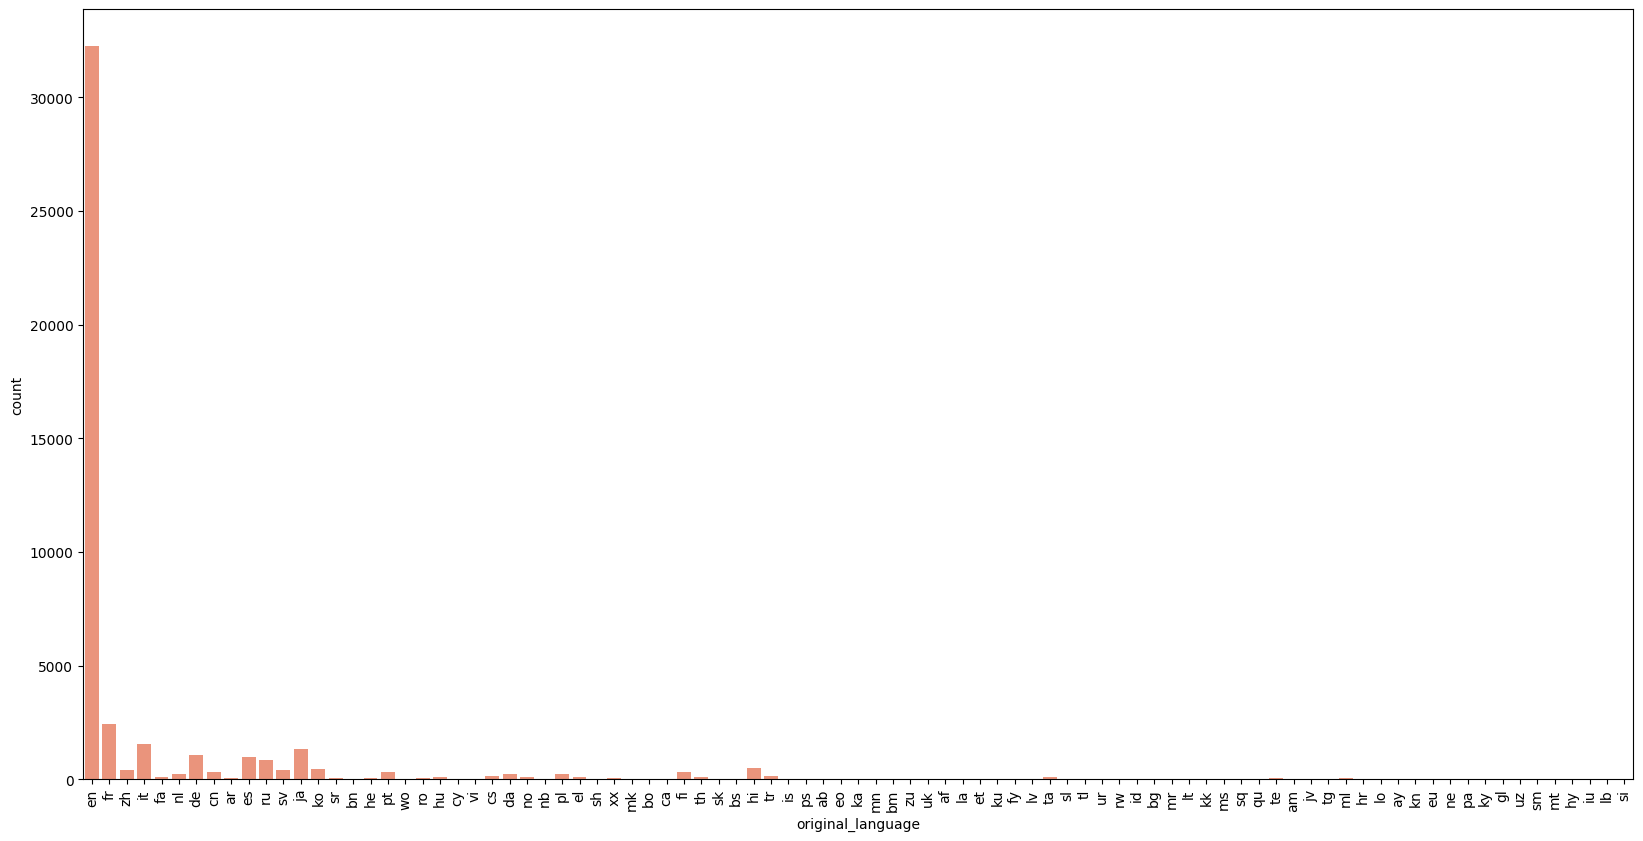

In [33]:
colors = plt.cm.Reds(np.linspace(0.4, 1, len(movies['original_language'])))

plt.figure(figsize=(20, 10))
sns.countplot(x=movies['original_language'], palette=colors)
plt.xticks(rotation=90)
plt.show()

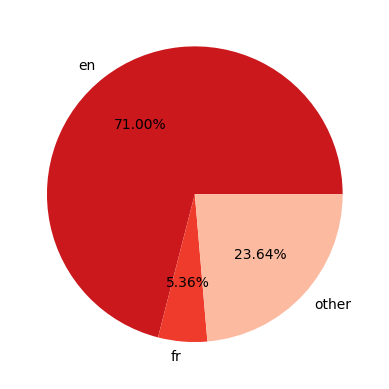

In [34]:
original_lan = movies['original_language'].value_counts()
original_lan = np.array([original_lan['en'], original_lan['fr'], original_lan.sum() - original_lan['en'] - original_lan['fr']])
plt.pie(original_lan, labels=['en', 'fr', 'other'], autopct='%1.2f%%', colors=['#cb181d', '#ef3b2c', '#fcbba1'])
plt.show()

## The Influence of Budget and Revenue on Popularity of Movies

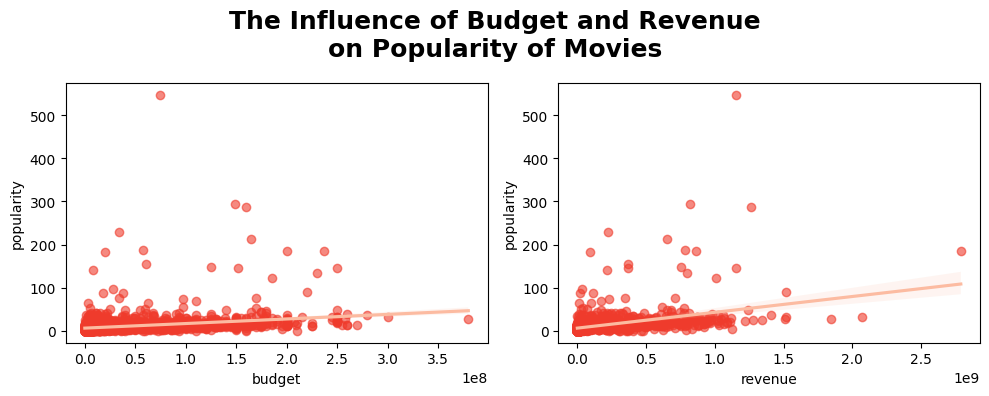

In [39]:
df_plot = movies[(movies['budget'] != 0) & (movies['revenue'] != 0)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('The Influence of Budget and Revenue\non Popularity of Movies', fontsize=18, weight=600)
for i, col in enumerate(['budget', 'revenue']):
    sns.regplot(data=df_plot, x=col, y='popularity',
                scatter_kws={"color": "#ef3b2c", "alpha": 0.6}, line_kws={"color": "#fcbba1"}, ax=axes[i])

plt.tight_layout()

## Budget vs Revenue

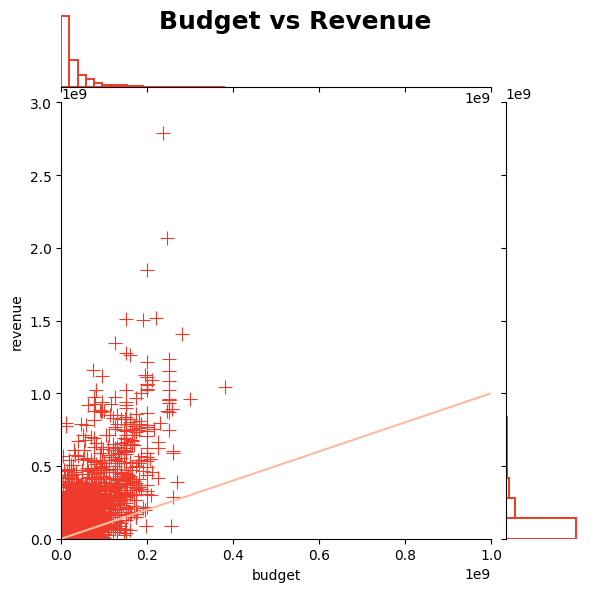

In [42]:
ax = sns.jointplot(data=movies[(movies['budget'] != 0) & (movies['revenue'] != 0)], x='budget', y='revenue',
                   marker="+", s=100, marginal_kws=dict(bins=20, fill=False), color='#ef3b2c')
ax.fig.suptitle('Budget vs Revenue', fontsize=18, weight=600)
ax.ax_joint.set_xlim(0, 1e9)
ax.ax_joint.set_ylim(0, 3e9)
ax.ax_joint.axline((1,1), slope=1, color='#fcbba1')

In [52]:
import ast

genres_list = []
for genre_list_str in movies['genres']:
    try:
        # Safely evaluate the string representation of the list
        genre_list = ast.literal_eval(genre_list_str)
        for genre in genre_list:
            # Check if 'genre' is a dictionary before accessing 'name'
            if isinstance(genre, dict) and 'name' in genre:
                # Extract the genre name from the dictionary and add to the list
                genres_list.append(genre['name'])
    except (ValueError, SyntaxError):
        # Handle cases where the string is not a valid list representation
        continue

print(genres_list)

[]


In [68]:
genres_list = []

for i in movies['genres']:
    lst = ast.literal_eval(i)   # convert string → list
    for j in lst:
        genres_list.append(j)

print(genres_list)


['animation', 'comedy', 'family', 'adventure', 'fantasy', 'family', 'romance', 'comedy', 'comedy', 'drama', 'romance', 'action', 'crime', 'drama', 'thriller', 'comedy', 'romance', 'action', 'adventure', 'drama', 'family', 'action', 'adventure', 'thriller', 'adventure', 'action', 'thriller', 'comedy', 'drama', 'romance', 'comedy', 'horror', 'family', 'animation', 'adventure', 'history', 'drama', 'action', 'adventure', 'drama', 'crime', 'drama', 'romance', 'crime', 'comedy', 'crime', 'comedy', 'adventure', 'action', 'comedy', 'crime', 'comedy', 'thriller', 'crime', 'drama', 'thriller', 'action', 'adventure', 'crime', 'thriller', 'drama', 'fantasy', 'sciencefiction', 'thriller', 'drama', 'romance', 'comedy', 'drama', 'family', 'drama', 'romance', 'fantasy', 'sciencefiction', 'adventure', 'drama', 'crime', 'drama', 'crime', 'sciencefiction', 'thriller', 'mystery', 'romance', 'adventure', 'fantasy', 'drama', 'comedy', 'family', 'history', 'drama', 'romance', 'adventure', 'history', 'drama',

/tmp/ipython-input-2000994646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#cb181d', '#ef3b2c', '#fc9272', '#fb6a4a', '#ef3b2c', '#fcbba1'])
/tmp/ipython-input-2000994646.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#cb181d', '#ef3b2c', '#fc9272', '#fb6a4a', '#ef3b2c', '#fcbba1'])


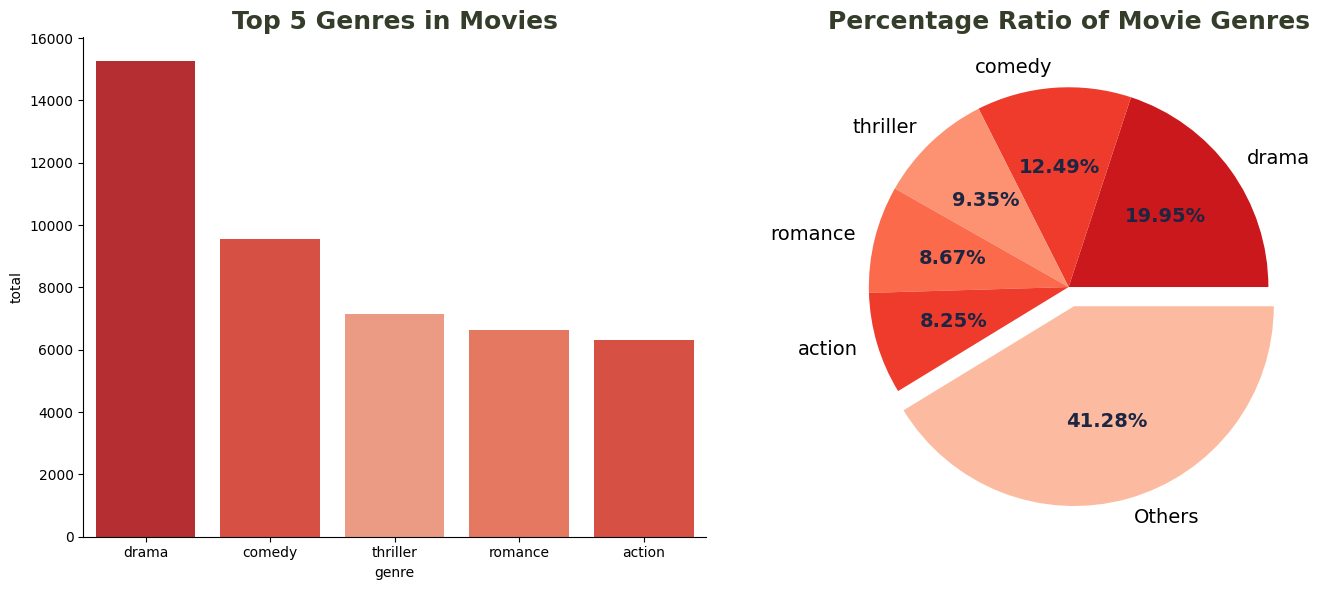

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#cb181d', '#ef3b2c', '#fc9272', '#fb6a4a', '#ef3b2c', '#fcbba1'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

# Correcting the data preparation for the pie chart
genre_counts = Counter(genres_list)
top_genres = genre_counts.most_common(5)
top_genres_df = pd.DataFrame(top_genres, columns=['genre', 'total'])

# Calculate the sum of the remaining genres
other_total = sum([count for genre, count in genre_counts.items() if genre not in top_genres_df['genre'].tolist()])

# Create a new DataFrame for the pie chart including 'Others'
df_plot_pie = pd.concat([top_genres_df, pd.DataFrame([{'genre': 'Others', 'total': other_total}])], ignore_index=True)

plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot_pie['total'], labels=df_plot_pie['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#cb181d', '#ef3b2c', '#fc9272', '#fb6a4a', '#ef3b2c', '#fcbba1']) # Added red theme colors

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')
plt.tight_layout()
plt.show()

## Release Date

In [74]:
for i in range(movies.shape[0]):
    if movies.loc[i, 'release_date'] == 'NANE':
        movies.loc[i, 'release_date'] = np.nan
movies['release_date']

,release_date
0,1995-10-30
1,1995-12-15
2,1995-12-22
3,1995-12-22
4,1995-02-10
...,...
45455,NaN
45456,2011-11-17
45457,2003-08-01
45458,1917-10-21


/tmp/ipython-input-2189280811.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=movies, x='release_date', kind='hist', kde=True, line_kws={'lw': 3}, aspect=3, palette=['#fc9272, #fb6a4a'])


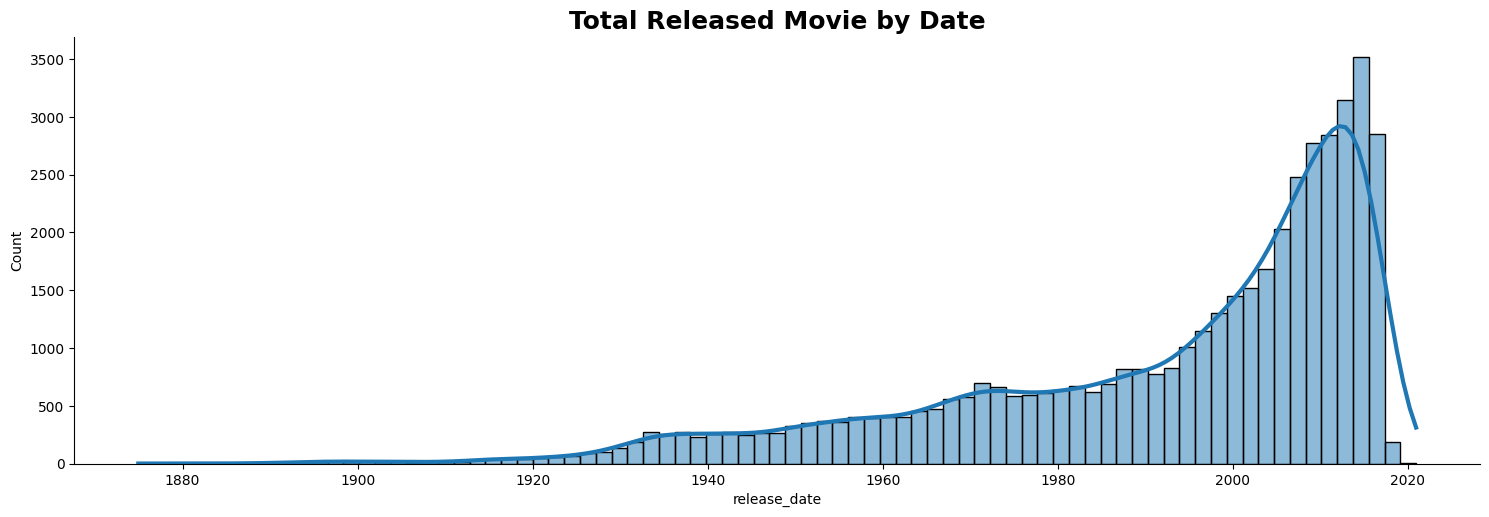

In [82]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
sns.displot(data=movies, x='release_date', kind='hist', kde=True, line_kws={'lw': 3}, aspect=3, palette=['#fc9272, #fb6a4a'])
plt.title('Total Released Movie by Date', fontsize=18, weight=600)
plt.show()


## Top 5s


In [ ]:
genres_list = []

for i in movies['genres']:
    lst = ast.literal_eval(i)   # convert string → list
    for j in lst:
        genres_list.append(j)

print(genres_list)

In [106]:
spoken_languages_list = []
for i in movies['spoken_languages']:
    if i != '':
        spoken_languages_list.extend(i.split(', '))

In [122]:
company_list = []

for i in movies['production_companies']:
    # Skip NaN / floats
    if not isinstance(i, str):
        continue

    # Skip empty string
    if i.strip() == "":
        continue

    try:
        # Try to parse as Python literal
        lst = ast.literal_eval(i)

        # Skip if it's just []
        if isinstance(lst, list) and len(lst) == 0:
            continue

        # If it's a list, extend
        if isinstance(lst, list):
            company_list.extend(lst)
        else:
            # If not a list (plain string), wrap in list
            company_list.append(str(lst))

    except (SyntaxError, ValueError):
        # Fallback: treat as plain string
        company_list.append(i)

print(company_list[:20])

['Pixar Animation Studios', 'TriStar Pictures', 'Teitler Film', 'Interscope Communications', 'Warner Bros.', 'Lancaster Gate', 'Twentieth Century Fox Film Corporation', 'Sandollar Productions', 'Touchstone Pictures', 'Regency Enterprises', 'Forward Pass', 'Warner Bros.', 'Paramount Pictures', 'Scott Rudin Productions', 'Mirage Enterprises', 'Sandollar Productions', 'Constellation Entertainment', 'Worldwide', 'Mont Blanc Entertainment GmbH', 'Walt Disney Pictures']


In [123]:
country_list = []

for i in movies['production_countries']:
    # Skip NaN / floats
    if not isinstance(i, str):
        continue

    # Skip empty string
    if i.strip() == "":
        continue

    try:
        # Try to parse as Python literal
        lst = ast.literal_eval(i)

        # Skip if it's just []
        if isinstance(lst, list) and len(lst) == 0:
            continue

        # If it's a list, extend
        if isinstance(lst, list):
            country_list.extend(lst)
        else:
            # If not a list (plain string), wrap in list
            country_list.append(str(lst))

    except (SyntaxError, ValueError):
        # Fallback: treat as plain string
        country_list.append(i)

print(country_list[:20])

['United States of America', 'United States of America', 'United States of America', 'United States of America', 'United States of America', 'United States of America', 'Germany', 'United States of America', 'United States of America', 'United States of America', 'United Kingdom', 'United States of America', 'United States of America', 'France', 'United States of America', 'United States of America', 'United States of America', 'France', 'Germany', 'Italy']


In [124]:
original_language_list = []

for i in movies['original_language']:
    # Skip NaN / floats
    if not isinstance(i, str):
        continue

    # Skip empty string
    if i.strip() == "":
        continue

    try:
        # Try to parse as Python literal
        lst = ast.literal_eval(i)

        # Skip if it's just []
        if isinstance(lst, list) and len(lst) == 0:
            continue

        # If it's a list, extend
        if isinstance(lst, list):
            original_language_list.extend(lst)
        else:
            # If not a list (plain string), wrap in list
            original_language_list.append(str(lst))

    except (SyntaxError, ValueError):
        # Fallback: treat as plain string
        original_language_list.append(i)

print(original_language_list[:20])

['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en']


In [127]:
cast_list = []

for i in credits['cast']:
    # Skip NaN / floats
    if not isinstance(i, str):
        continue

    # Skip empty string
    if i.strip() == "":
        continue

    try:
        # Try to parse as Python literal
        lst = ast.literal_eval(i)

        # Skip if it's just []
        if isinstance(lst, list) and len(lst) == 0:
            continue

        # If it's a list, extend
        if isinstance(lst, list):
            cast_list.extend(lst)
        else:
            # If not a list (plain string), wrap in list
            cast_list.append(str(lst))

    except (SyntaxError, ValueError):
        # Fallback: treat as plain string
        cast_list.append(i)

print(cast_list[:20])

['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Robin Williams', 'Jonathan Hyde', 'Kirsten Dunst', 'Bradley Pierce', 'Walter Matthau', 'Jack Lemmon', 'Ann-Margret', 'Sophia Loren', 'Whitney Houston', 'Angela Bassett', 'Loretta Devine', 'Lela Rochon', 'Steve Martin', 'Diane Keaton', 'Martin Short', 'Kimberly Williams-Paisley']


In [135]:
movies['director'] = credits['job'].apply(
    lambda d: d.get('director') if isinstance(d, dict) else np.nan
)
print(directors[:10])  # preview first 10

[]


In [142]:
def safe_eval(x):
    if not isinstance(x, str):
        return {}
    try:
        # Replace 'nan' with 'np.nan' so eval can parse
        return ast.literal_eval(x.replace("nan", "np.nan"))
    except:
        return {}

credits['job'] = credits['job'].apply(safe_eval)

In [143]:
directors = [
    row['director']
    for row in credits['job']
    if isinstance(row, dict) and pd.notna(row.get('director'))
]
print(directors[:10])  # preview first 10

['Joe Johnston', 'Forest Whitaker', 'Charles Shyer', 'Michael Mann', 'Sydney Pollack', 'Martin Campbell', 'Oliver Stone', 'Allison Anders', 'Steve Oedekerk', 'Joseph Ruben']


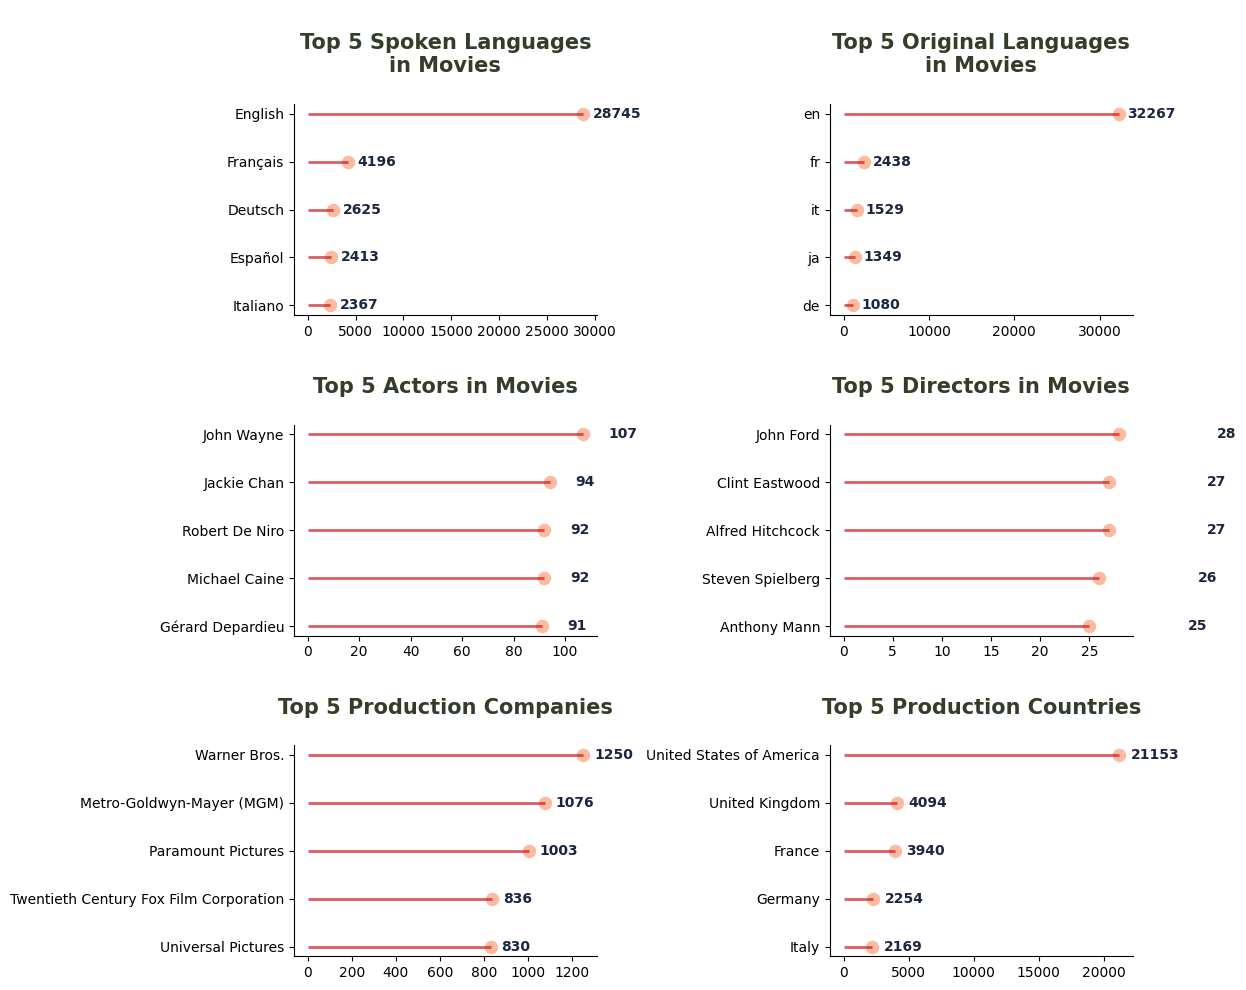

In [146]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 10))

# Spoken language plot
df_plot1 = pd.DataFrame(Counter(spoken_languages_list).most_common(5), columns=['language', 'total']).sort_values(by='total', ascending=True)
axes[0,0].hlines(y=df_plot1['language'], xmin=0, xmax=df_plot1['total'], color= '#cb181d', alpha=0.7, linewidth=2)
axes[0,0].scatter(x=df_plot1['total'], y=df_plot1['language'], s = 75, color='#fcbba1')
axes[0,0].set_title('\nTop 5 Spoken Languages\nin Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot1['total']):
    axes[0,0].text(value+1000, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Original Language plot
df_plot2 = pd.DataFrame(Counter(original_language_list).most_common(5), columns=['language', 'total']).sort_values(by='total', ascending=True)
axes[0,1].hlines(y=df_plot2['language'], xmin=0, xmax=df_plot2['total'], color= '#cb181d', alpha=0.7, linewidth=2)
axes[0,1].scatter(x=df_plot2['total'], y=df_plot2['language'], s = 75, color='#fcbba1')
axes[0,1].set_title('\nTop 5 Original Languages\nin Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot2['total']):
    axes[0,1].text(value+1000, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Actor plot
df_plot3 = pd.DataFrame(Counter(cast_list).most_common(5), columns=['actor', 'total']).sort_values(by='total', ascending=True)
axes[1,0].hlines(y=df_plot3['actor'], xmin=0, xmax=df_plot3['total'], color= '#cb181d', alpha=0.7, linewidth=2)
axes[1,0].scatter(x=df_plot3['total'], y=df_plot3['actor'], s = 75, color='#fcbba1')
axes[1,0].set_title('\nTop 5 Actors in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot3['total']):
    axes[1,0].text(value+10, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Crew plot
df_plot4 = pd.DataFrame(Counter(directors).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[1,1].hlines(y=df_plot4['name'], xmin=0, xmax=df_plot4['total'], color= '#cb181d', alpha=0.7, linewidth=2)
axes[1,1].scatter(x=df_plot4['total'], y=df_plot4['name'], s = 75, color='#fcbba1')
axes[1,1].set_title('\nTop 5 Directors in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot4['total']):
    axes[1,1].text(value+10, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Company plot
df_plot5 = pd.DataFrame(Counter(company_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[2,0].hlines(y=df_plot5['name'], xmin=0, xmax=df_plot5['total'], color= '#cb181d', alpha=0.7, linewidth=2)
axes[2,0].scatter(x=df_plot5['total'], y=df_plot5['name'], s = 75, color='#fcbba1')
axes[2,0].set_title('\nTop 5 Production Companies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot5['total']):
    axes[2,0].text(value+50, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Country plot
df_plot6 = pd.DataFrame(Counter(country_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[2,1].hlines(y=df_plot6['name'], xmin=0, xmax=df_plot6['total'], color= '#cb181d', alpha=0.7, linewidth=2)
axes[2,1].scatter(x=df_plot6['total'], y=df_plot6['name'], s = 75, color='#fcbba1')
axes[2,1].set_title('\nTop 5 Production Countries\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot6['total']):
    axes[2,1].text(value+900, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

sns.despine()
plt.tight_layout()

## Data Distribution Across Top 5 Genres

Top genres: ['drama', 'comedy', 'thriller', 'romance', 'action']


/tmp/ipython-input-604543180.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/tmp/ipython-input-604543180.py:31: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.stripplot(
/tmp/ipython-input-604543180.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/tmp/ipython-input-604543180.py:31: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.stripplot(
/tmp/ipython-input-604543180.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot

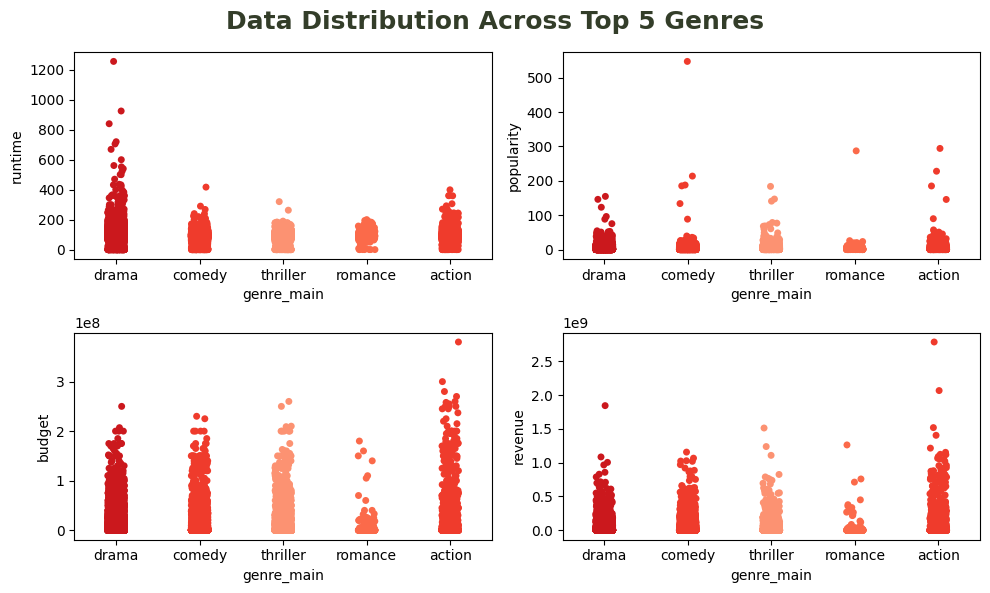

In [154]:
top_genres = [g for g, _ in Counter(genres_list).most_common(5)]
print("Top genres:", top_genres)

def to_list(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    return []

movies = movies.copy()
movies['genres'] = movies['genres'].apply(to_list)

mask = movies['genres'].apply(lambda g: any(tg in g for tg in top_genres))

movies.loc[mask, 'genre_main'] = movies.loc[mask, 'genres'].apply(
    lambda g: next((tg for tg in top_genres if tg in g), np.nan)
)

df_plot = movies[mask & movies['genre_main'].notna()].copy()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
plt.suptitle('Data Distribution Across Top 5 Genres', fontsize=18, weight=600, color='#333d29')

palette = ['#cb181d', '#ef3b2c', '#fc9272', '#fb6a4a', '#ef3b2c', '#fcbba1']

for i, y in enumerate(['runtime', 'popularity', 'budget', 'revenue']):
    sns.stripplot(
        data=df_plot,
        x='genre_main', y=y,
        order=top_genres,
        ax=axes.flatten()[i],
        palette=palette
    )

plt.tight_layout()
plt.show()


## Correlation with vote_count

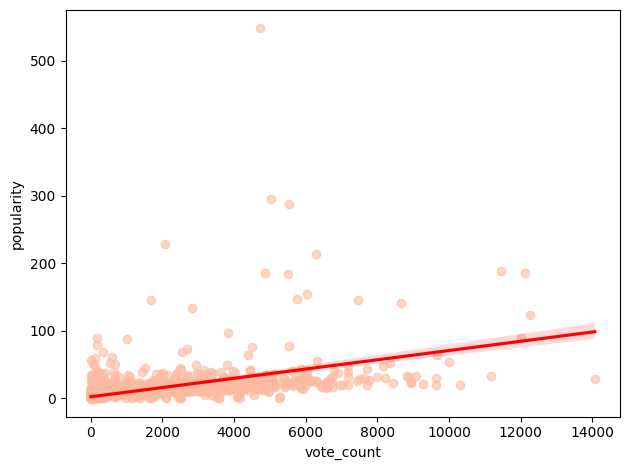

In [165]:
sns.regplot(data=movies, x='vote_count', y='popularity',
           scatter_kws={"alpha": 0.6, 'color': '#fcbba1'},
    line_kws={'color': 'red'} )

plt.tight_layout()

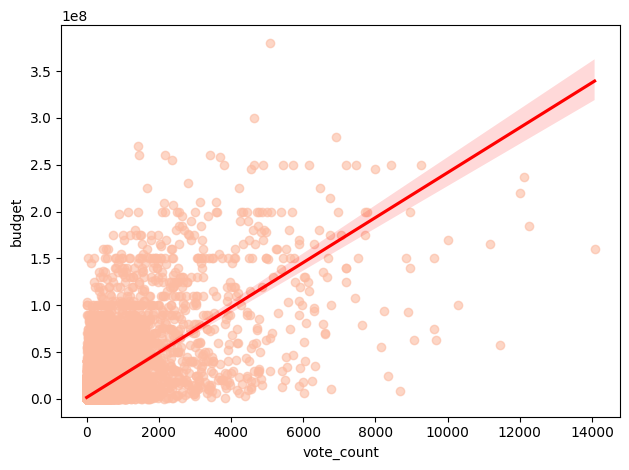

In [166]:
sns.regplot(data=movies, x='vote_count', y='budget',
            scatter_kws={"alpha": 0.6, 'color': '#fcbba1'},
    line_kws={'color': 'red'} )

plt.tight_layout()

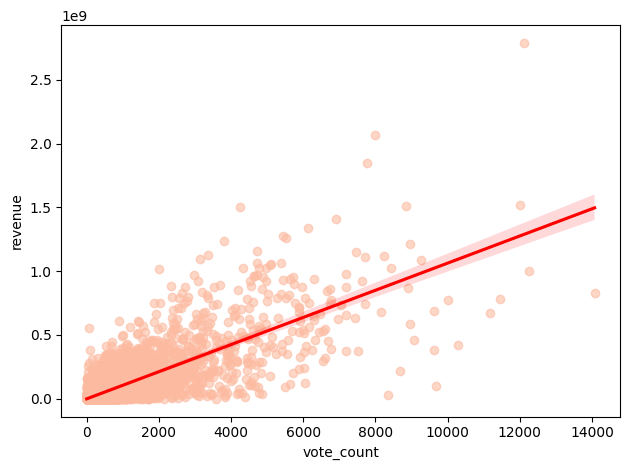

In [167]:
sns.regplot(data=movies, x='vote_count', y='revenue',
            scatter_kws={"alpha": 0.6, 'color': '#fcbba1'},
    line_kws={'color': 'red'} )

plt.tight_layout()

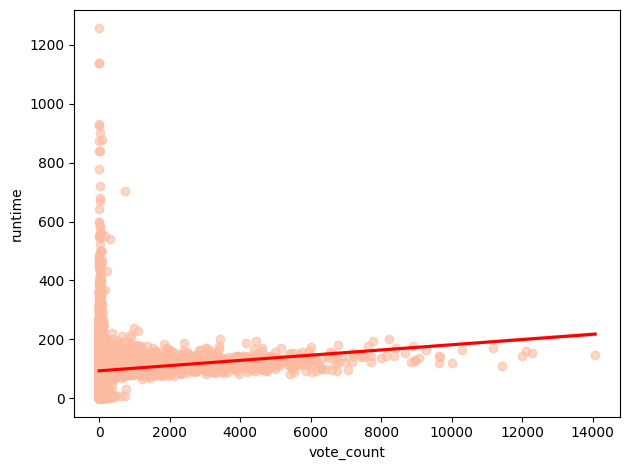

In [168]:
sns.regplot(data=movies, x='vote_count', y='runtime',
            scatter_kws={"alpha": 0.6, 'color': '#fcbba1'},
    line_kws={'color': 'red'} )

plt.tight_layout()